In [1]:
import pandas as pd, numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Godsgift Olomu\Downloads\PHC Data\Scenario_Analysis.csv")

In [3]:
df

,LGA,Doctors,Nurses,Population,Doctor coverage per 10000,Nurses coverage per 10000,Total coverage per 10000,Nurses coverage (WHC) %,Doctor officers coverage (WHC) %,Total Coverage (WHC) %
0,Akoko Edo,3,17,386400,0.08,0.44,3.44,4.4,0.8,7.82
1,Egor,1,26,502700,0.02,0.52,1.52,5.2,0.2,3.45
2,Esan Central,1,20,155500,0.06,1.29,2.29,12.9,0.6,5.20
3,Esan North East,1,25,180200,0.06,1.39,2.39,13.9,0.6,5.43
4,Esan South East,1,12,245700,0.04,0.49,1.49,4.9,0.4,3.39
5,Esan West,2,23,188700,0.11,1.22,3.22,12.2,1.1,7.32
6,Etsako Central,1,9,139200,0.07,0.65,1.65,6.5,0.7,3.75
7,Etsako East,2,14,217700,0.09,0.64,2.64,6.4,0.9,6.00
8,Etsako West,2,13,294000,0.07,0.44,2.44,4.4,0.7,5.55
9,Igueben,1,12,103800,0.10,1.16,2.16,11.6,1.0,4.91


In [30]:
work_df = df.copy()

In [101]:
work_df[['Doctors','Nurses','Population','Total Coverage (WHC) %']].corr()

,Doctors,Nurses,Population,Total Coverage (WHC) %
Doctors,1.000000,0.221475,0.655438,0.946492
Nurses,0.221475,1.000000,0.180712,0.403357
Population,0.655438,0.180712,1.000000,0.466725
Total Coverage (WHC) %,0.946492,0.403357,0.466725,1.000000


In [32]:
model_df = work_df[['Doctors','Nurses','Population','Total Coverage (WHC) %']]

In [33]:
model_df

,Doctors,Nurses,Population,Total Coverage (WHC) %
0,3,17,386400,7.82
1,1,26,502700,3.45
2,1,20,155500,5.20
3,1,25,180200,5.43
4,1,12,245700,3.39
5,2,23,188700,7.32
6,1,9,139200,3.75
7,2,14,217700,6.00
8,2,13,294000,5.55
9,1,12,103800,4.91


In [40]:
import matplotlib.pyplot as plt, seaborn as sns

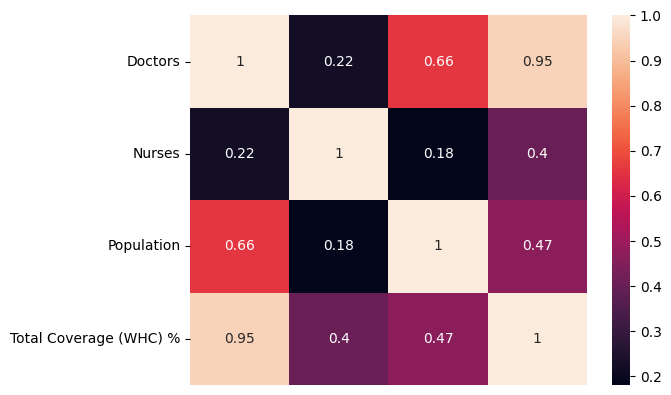

In [42]:
sns.heatmap(data=model_df.corr(),annot=True, xticklabels=False)
plt.show()

In [43]:
from sklearn.preprocessing import StandardScaler

In [73]:
sc = StandardScaler()
scaled_population = sc.fit_transform(model_df[['Population']])

In [74]:
model_df['Population Scaled'] = scaled_population[:,0]

C:\Windows\Temp\ipykernel_4736\1690090718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['Population Scaled'] = scaled_population[:,0]


In [75]:
model_df

,Doctors,Nurses,Population,Total Coverage (WHC) %,Population Scaled
0,3,17,386400,7.82,0.889247
1,1,26,502700,3.45,1.743834
2,1,20,155500,5.20,-0.807437
3,1,25,180200,5.43,-0.625938
4,1,12,245700,3.39,-0.144636
5,2,23,188700,7.32,-0.563479
6,1,9,139200,3.75,-0.927212
7,2,14,217700,6.00,-0.350383
8,2,13,294000,5.55,0.210279
9,1,12,103800,4.91,-1.187336


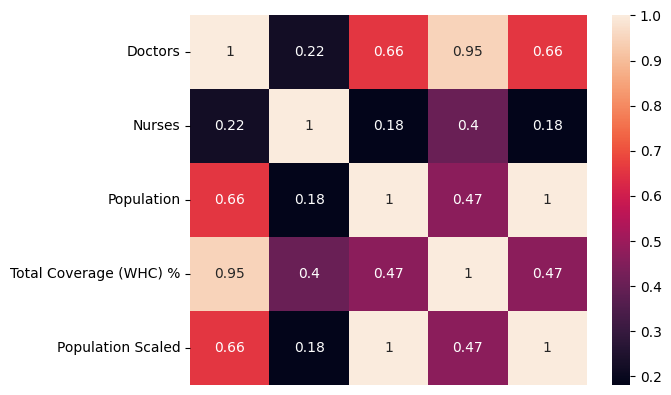

In [76]:
sns.heatmap(data=model_df.corr(),annot=True, xticklabels=False)
plt.show()

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [79]:
model_df.columns

Index(['Doctors', 'Nurses', 'Population', 'Total Coverage (WHC) %',
       'Population Scaled'],
      dtype='object')

In [82]:
X = model_df[['Doctors', 'Nurses','Population Scaled']].values
y = model_df['Total Coverage (WHC) %'].values

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [86]:
model = LinearRegression()

In [88]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [95]:
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
mse = mean_squared_error(y_test,y_pred)
print(mse)

0.11867252566259538


In [98]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.9525227603467553


In [6]:
# WHO standard per 10,000 population
WHO_standard_doctors = 10
WHO_standard_nurses = 30

In [7]:
# Calculate the deficit for doctors and nurses
work_df['Deficit_Doctors'] = WHO_standard_doctors - work_df['Doctor coverage per 10000']
work_df['Deficit_Nurses'] = WHO_standard_nurses - work_df['Nurses coverage per 10000']

In [8]:
# Ensure no negative values for deficit
work_df['Deficit_Doctors'] = work_df['Deficit_Doctors'].apply(lambda x: max(x, 0))
work_df['Deficit_Nurses'] = work_df['Deficit_Nurses'].apply(lambda x: max(x, 0))

In [9]:
work_df

,LGA,Doctors,Nurses,Population,Doctor coverage per 10000,Nurses coverage per 10000,Total coverage per 10000,Nurses coverage (WHC) %,Doctor officers coverage (WHC) %,Total Coverage (WHC) %,Deficit_Doctors,Deficit_Nurses
0,Akoko Edo,3,17,386400,0.08,0.44,3.44,4.4,0.8,7.82,9.92,29.56
1,Egor,1,26,502700,0.02,0.52,1.52,5.2,0.2,3.45,9.98,29.48
2,Esan Central,1,20,155500,0.06,1.29,2.29,12.9,0.6,5.20,9.94,28.71
3,Esan North East,1,25,180200,0.06,1.39,2.39,13.9,0.6,5.43,9.94,28.61
4,Esan South East,1,12,245700,0.04,0.49,1.49,4.9,0.4,3.39,9.96,29.51
5,Esan West,2,23,188700,0.11,1.22,3.22,12.2,1.1,7.32,9.89,28.78
6,Etsako Central,1,9,139200,0.07,0.65,1.65,6.5,0.7,3.75,9.93,29.35
7,Etsako East,2,14,217700,0.09,0.64,2.64,6.4,0.9,6.00,9.91,29.36
8,Etsako West,2,13,294000,0.07,0.44,2.44,4.4,0.7,5.55,9.93,29.56
9,Igueben,1,12,103800,0.10,1.16,2.16,11.6,1.0,4.91,9.90,28.84


In [10]:
# Define features and targets using coverage per 10000 population
X_doctors = work_df[['Doctors', 'Nurses', 'Population']]
y_doctors = work_df['Deficit_Doctors']

X_nurses = work_df[['Doctors', 'Nurses', 'Population']]
y_nurses = work_df['Deficit_Nurses']

In [11]:
# Split the data into training and testing sets for doctors
X_train_doctors, X_test_doctors, y_train_doctors, y_test_doctors = train_test_split(X_doctors, y_doctors, test_size=0.2, random_state=42)

# Split the data into training and testing sets for nurses
X_train_nurses, X_test_nurses, y_train_nurses, y_test_nurses = train_test_split(X_nurses, y_nurses, test_size=0.2, random_state=42)

In [12]:
# Create the model for doctors
model_doctors = LinearRegression()

# Train the model for doctors
model_doctors.fit(X_train_doctors, y_train_doctors)

# Predict on the test set for doctors
y_pred_doctors = model_doctors.predict(X_test_doctors)

In [13]:
# Create the model for nurses
model_nurses = LinearRegression()

# Train the model for nurses
model_nurses.fit(X_train_nurses, y_train_nurses)

# Predict on the test set for nurses
y_pred_nurses = model_nurses.predict(X_test_nurses)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# Calculate MSE and R-squared for doctors
mse_doctors = mean_squared_error(y_test_doctors, y_pred_doctors)
r2_doctors = r2_score(y_test_doctors, y_pred_doctors)

In [16]:
print(f"Doctors - Mean Squared Error: {mse_doctors}")
print(f"Doctors - R-squared: {r2_doctors}")

Doctors - Mean Squared Error: 0.002801763981658696
Doctors - R-squared: -1.6683466491987589


In [17]:
# Calculate MSE and R-squared for nurses
mse_nurses = mean_squared_error(y_test_nurses, y_pred_nurses)
r2_nurses = r2_score(y_test_nurses, y_pred_nurses)

In [18]:
print(f"Nurses - Mean Squared Error: {mse_nurses}")
print(f"Nurses - R-squared: {r2_nurses}")

Nurses - Mean Squared Error: 0.01342305793242757
Nurses - R-squared: 0.8751052995354488


In [19]:
# Predict the deficit for the entire dataset
work_df['Predicted_Deficit_Doctors'] = model_doctors.predict(X_doctors)
work_df['Predicted_Deficit_Nurses'] = model_nurses.predict(X_nurses)

In [20]:
# Calculate additional doctors and nurses needed
work_df['Additional_Doctors'] = np.round(work_df['Predicted_Deficit_Doctors'] * (work_df['Population'] / 10000),0)
work_df['Additional_Nurses'] = np.round(work_df['Predicted_Deficit_Nurses'] * (work_df['Population'] / 10000),0)

In [21]:
# Display the updated DataFrame
work_df[['LGA', 'Additional_Doctors', 'Additional_Nurses']]

,LGA,Additional_Doctors,Additional_Nurses
0,Akoko Edo,384.0,1138.0
1,Egor,507.0,1477.0
2,Esan Central,154.0,449.0
3,Esan North East,179.0,519.0
4,Esan South East,245.0,721.0
5,Esan West,187.0,545.0
6,Etsako Central,138.0,407.0
7,Etsako East,216.0,636.0
8,Etsako West,292.0,864.0
9,Igueben,103.0,302.0


In [22]:
work_df

,LGA,Doctors,Nurses,Population,Doctor coverage per 10000,Nurses coverage per 10000,Total coverage per 10000,Nurses coverage (WHC) %,Doctor officers coverage (WHC) %,Total Coverage (WHC) %,Deficit_Doctors,Deficit_Nurses,Predicted_Deficit_Doctors,Predicted_Deficit_Nurses,Additional_Doctors,Additional_Nurses
0,Akoko Edo,3,17,386400,0.08,0.44,3.44,4.4,0.8,7.82,9.92,29.56,9.926973,29.458572,384.0,1138.0
1,Egor,1,26,502700,0.02,0.52,1.52,5.2,0.2,3.45,9.98,29.48,10.085062,29.381365,507.0,1477.0
2,Esan Central,1,20,155500,0.06,1.29,2.29,12.9,0.6,5.20,9.94,28.71,9.934127,28.903901,154.0,449.0
3,Esan North East,1,25,180200,0.06,1.39,2.39,13.9,0.6,5.43,9.94,28.61,9.947909,28.789826,179.0,519.0
4,Esan South East,1,12,245700,0.04,0.49,1.49,4.9,0.4,3.39,9.96,29.51,9.966975,29.337379,245.0,721.0
5,Esan West,2,23,188700,0.11,1.22,3.22,12.2,1.1,7.32,9.89,28.78,9.898736,28.876441,187.0,545.0
6,Etsako Central,1,9,139200,0.07,0.65,1.65,6.5,0.7,3.75,9.93,29.35,9.919906,29.228459,138.0,407.0
7,Etsako East,2,14,217700,0.09,0.64,2.64,6.4,0.9,6.00,9.91,29.36,9.905018,29.223893,216.0,636.0
8,Etsako West,2,13,294000,0.07,0.44,2.44,4.4,0.7,5.55,9.93,29.56,9.936644,29.403875,292.0,864.0
9,Igueben,1,12,103800,0.10,1.16,2.16,11.6,1.0,4.91,9.90,28.84,9.906921,29.062858,103.0,302.0


In [23]:
import joblib

In [24]:
# Save the models
joblib.dump(model_doctors, r"C:\Users\Godsgift Olomu\Desktop\scenario analysis\model_doctors.pkl")
joblib.dump(model_nurses, r"C:\Users\Godsgift Olomu\Desktop\scenario analysis\model_nurses.pkl")

['C:\\Users\\Godsgift Olomu\\Desktop\\scenario analysis\\model_nurses.pkl']